## Problem statement
* Using Iris data cluster Iris flowers into different clusters based on similarity.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# load data
data=pd.read_csv("Iris.csv")

In [3]:
# drop unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Basic checks

In [5]:
# check no of rows and columns
data.shape

(150, 5)

In [6]:
# print first 5 rows
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# print last 5 rows
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
# print all the columns
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [9]:
# check data type of each column
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [10]:
# check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
# statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
data.target.unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='petal_length', ylabel='petal_width'>

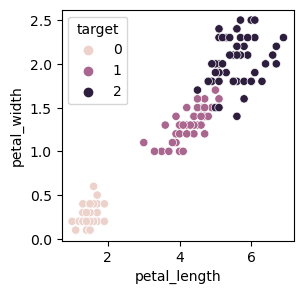

In [13]:
# EDA
plt.figure(figsize=(3,3))
sns.scatterplot(data=data,x='petal_length',y='petal_width',hue='target')

## Data Preprocessing

In [14]:
# check for missing value
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [15]:
# check for duplicates
data.duplicated().sum()

3

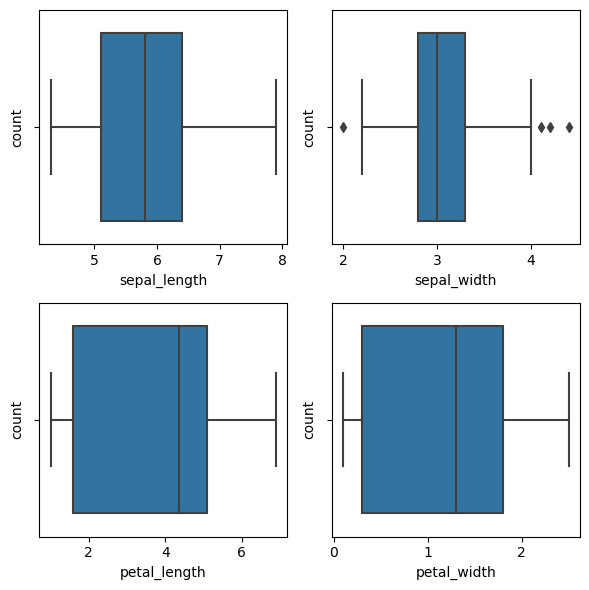

In [16]:
# check for outliers
plt.figure(figsize=(6,6))
plotnumber=1

for column in data.drop('target',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='sepal_width', ylabel='Count'>

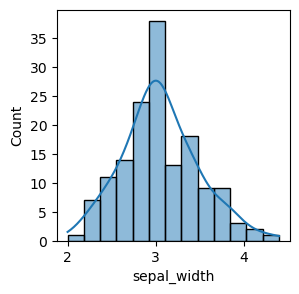

In [17]:
# Check for distribution of data for sepal_width
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='sepal_width',kde=True)

### Insights
* clearly we see outliers in sepal_width columns and distribution of sepal_width is normal will use 3-sigma rule identify the outlier
* replace outlier with mean since data is normal

### 3-sigma rule

In [18]:
low_limit=data['sepal_width'].mean()-3*data['sepal_width'].std()
upper_limit=data['sepal_width'].mean()+3*data['sepal_width'].std()
print("lower limit",low_limit)
print("upper limit",upper_limit)

lower limit 1.7532170659134791
upper limit 4.354782934086521


In [19]:
# find value less than lower limit
data.loc[data['sepal_width']<low_limit]

,sepal_length,sepal_width,petal_length,petal_width,target


In [20]:
# find value less than upper limit
data.loc[data['sepal_width']>upper_limit]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [21]:
# repalce outlier with mean
data.loc[data['sepal_width']>upper_limit,'sepal_width']=data['sepal_width'].mean()

<Axes: xlabel='sepal_width'>

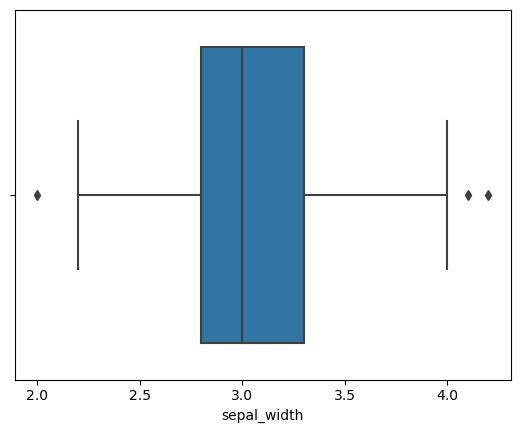

In [22]:
sns.boxplot(data=data,x='sepal_width')

In [23]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data[['sepal_length','sepal_width','petal_length','petal_width']]=scaling.fit_transform(data[['sepal_length','sepal_width','petal_length','petal_width']])

In [24]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.088864,-1.341272,-1.312977,0
1,-1.143017,-0.107760,-1.341272,-1.312977,0
2,-1.385353,0.370890,-1.398138,-1.312977,0
3,-1.506521,0.131565,-1.284407,-1.312977,0
4,-1.021849,1.328189,-1.341272,-1.312977,0


In [25]:
# remove target from data
x=data.drop('target',axis=1)

In [26]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


## Apply kmean model

In [27]:
# import kmean model
from sklearn.cluster import KMeans
# initialize the model
model=KMeans(n_clusters=6,random_state=10)
# train a model
model.fit(x)

KMeans(n_clusters=6, random_state=10)

In [28]:
# centriods-cluster centers
# no of custers is sames as number of centriods
model.cluster_centers_

array([[ 8.62520255e-01,  2.30595812e-01,  8.54920301e-01,
         1.05353673e+00],
       [-7.92495572e-01,  1.41366221e+00, -1.28643762e+00,
        -1.22376293e+00],
       [-3.64080601e-01, -1.44114126e+00,  1.07449102e-01,
         1.75297293e-03],
       [-1.29723056e+00,  8.30471707e-02, -1.32834838e+00,
        -1.29504859e+00],
       [ 2.53602227e-01, -5.29727484e-01,  5.48764020e-01,
         4.93046703e-01],
       [ 1.97705575e+00,  1.91396054e-01,  1.44514709e+00,
         1.11927322e+00]])

In [29]:
model.labels_

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 0, 0, 0, 2, 4, 4, 0, 2, 4, 2, 2, 4, 2, 4, 4, 0,
       4, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 4, 0, 0, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 0, 4, 5, 4, 0, 5, 2, 5, 4, 5,
       0, 4, 0, 4, 4, 0, 0, 5, 5, 2, 0, 4, 5, 4, 0, 5, 4, 4, 0, 5, 5, 5,
       0, 4, 4, 5, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

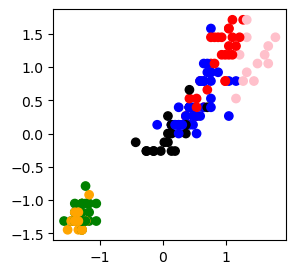

In [30]:
# visualize the clusters created by model
plt.figure(figsize=(3,3))
color_schema=np.array(["red","green","black","orange","blue","pink"])
plt.scatter(x.petal_length,data.petal_width,color=color_schema[model.labels_])

In [31]:
data['labels']=pd.DataFrame(model.labels_)

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.3303281700316024

In [33]:
# we see overlapping of clusters because number of clusters that we have choosen might be wrong

### How to find optimal value for k ?
* Elbow Method

Text(0, 0.5, 'wcss')

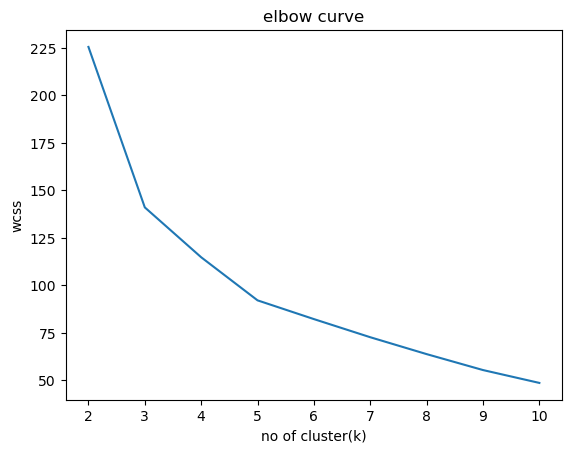

In [34]:
wcss=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(2,11),wcss)
plt.title('elbow curve')
plt.xlabel('no of cluster(k)')
plt.ylabel('wcss')
    
    

In [35]:
wcss

[225.50046206211442,
 141.06688377407846,
 114.82880681387991,
 92.15342859045303,
 82.29541504498772,
 72.74855093311186,
 63.865352122465936,
 55.48098553300096,
 48.70932612266401]

In [36]:
# clearly from elbow method the optimal value for k is 3

In [37]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [38]:
silhouette_score(x,model.labels_)

0.461588416586402

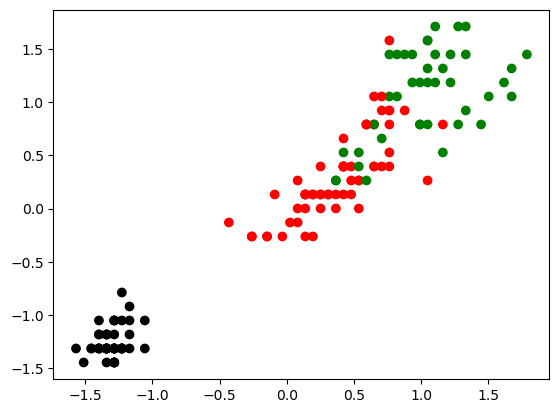

In [39]:
plt.scatter(x.petal_length,data.petal_width,color=color_schema[model.labels_])

In [44]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(N_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

TypeError: KNeighborsRegressor.__init__() got an unexpected keyword argument 'N_neighbors'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(N_Neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)